In [41]:
import pandas as pd
import numpy as np
import math
#https://docs.google.com/spreadsheets/d/1OdjccfGlv3lsuiWgIAHbE8id91FpVaU2EsaZo5kknaA/edit?usp=sharing

In [42]:

from io import BytesIO
import requests
spreadsheet_id = '1OdjccfGlv3lsuiWgIAHbE8id91FpVaU2EsaZo5kknaA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))


In [43]:
df.info()

# Convert string to datetime

df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format='%Y-%m-%d')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%Y-%m-%d')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format='%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
MMM-YY                  19104 non-null object
Emp_ID                  19104 non-null int64
Age                     19104 non-null int64
Gender                  19104 non-null object
City                    19104 non-null object
Education_Level         19104 non-null object
Salary                  19104 non-null int64
Dateofjoining           19104 non-null object
LastWorkingDate         1616 non-null object
Joining Designation     19104 non-null int64
Designation             19104 non-null int64
Total Business Value    19104 non-null int64
Quarterly Rating        19104 non-null int64
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [44]:
def get_info(df):

    print("Head:")
    display(df.head())
    print()
    
    print("Info:")
    display(df.info())
    print()
    
    print("Description of quantitative parameters:")
    display(df.describe())
    print()
    
    print("Description of categorical parameters:")
    display(df.describe(include='object'))
    print()
    
    print("Columns with NaN values:")
    display(df.isna().sum())
    print()
    
    print("Shape:")
    display(df.shape)
    print()
    
    print("Number of duplicated rows:")
    display(df.duplicated().sum())  

In [5]:
get_info(df)

Head:


,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
MMM-YY                  19104 non-null datetime64[ns]
Emp_ID                  19104 non-null int64
Age                     19104 non-null int64
Gender                  19104 non-null object
City                    19104 non-null object
Education_Level         19104 non-null object
Salary                  19104 non-null int64
Dateofjoining           19104 non-null datetime64[ns]
LastWorkingDate         1616 non-null datetime64[ns]
Joining Designation     19104 non-null int64
Designation             19104 non-null int64
Total Business Value    19104 non-null int64
Quarterly Rating        19104 non-null int64
dtypes: datetime64[ns](3), int64(7), object(3)
memory usage: 1.9+ MB


None


Description of quantitative parameters:


,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000



Description of categorical parameters:


,Gender,City,Education_Level
count,19104,19104,19104
unique,2,29,3
top,Male,C20,Bachelor
freq,11103,1008,6864



Columns with NaN values:


MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64


Shape:


(19104, 13)


Number of duplicated rows:


0

In [45]:
df['Emp_ID'].nunique()

2381

In [46]:
ids = df['Emp_ID'].unique()

In [47]:
df['Education_Level'].unique()

array(['Master', 'College', 'Bachelor'], dtype=object)

## Check whether education level changed

In [9]:
def education(df, id):
    temp = df.loc[df['Emp_ID'] == id]
    if temp['Education_Level'].nunique() > 1:
        return True
    else:
        return False

In [10]:
counter = 0
for i in ids:
    if (education(df, i)):
        counter = counter + 1
        
print(counter)

0


## Compare Designation and Salary

In [11]:
salary_ids = []
def salary(df, id):
    temp = df.loc[df['Emp_ID'] == id]
    if temp['Salary'].nunique() > 1:
        salary_ids.append(id)
        return True
    else:
        return False
    
designation_ids = []
def designation(df, id):
    temp = df.loc[df['Emp_ID'] == id]
    if temp['Designation'].nunique() > 1:
        designation_ids.append(id)
        return True
    else:
        return False

In [12]:
counter = 0
for i in ids:
    salary(df,i)
    designation(df,i)

In [13]:
#print(salary_ids)
#print(designation_ids)

if (salary_ids == designation_ids):
    print('Salary changed only for the people who had designation changed')

Salary changed only for the people who had designation changed


## Add columns

In [101]:
employee_dfs = [df[df['Emp_ID'] == i] for i in ids]
employee_features = {}
for employee_df in employee_dfs:
    id = employee_df.iloc[0]['Emp_ID']
    employee_features[id] = {}
    
    employee_features[id]['Emp_ID'] = id
    employee_features[id]['Salary Change'] = (employee_df['Salary'].max() - employee_df['Salary'].min()) / employee_df['Salary'].min()
    #employee_features[id]['Salary changed'] = employee_features[id]['Salary Change'] != 0
    employee_features[id]['Total Business Value All'] = employee_df['Total Business Value'].sum()
    employee_features[id]['Overvalue'] = (employee_df['Total Business Value'] / employee_df['Salary']).mean()
    
    last_day = employee_df.tail(1)['LastWorkingDate'].iloc[-1]
    if pd.isnull(last_day):
        last_day = float('NaN')
        last_working_day = pd.Timestamp(2017, 12, 1)
    else:
        last_working_day = last_day
        
    #employee_features[id]['LastWorkingDate'] = last_day
    
    join_date = employee_df[employee_df['Emp_ID'] == id]['Dateofjoining'].iloc[0]
    #employee_features[id]['Dateofjoining'] = join_date
        
    # Work experience: for not-fired calculated at 01.12.2017 
    employee_features[id]['Work Experience'] = math.ceil((last_working_day - join_date)/np.timedelta64(1, 'M'))
    
    employee_features[id]['Fired'] = not employee_df['LastWorkingDate'].isnull().values.all()
        
employee_features = pd.DataFrame.from_dict(employee_features, orient='index')

In [102]:
employee_features

,Emp_ID,Salary Change,Total Business Value All,Overvalue,Work Experience,Fired
1,1,0.0,1715580,9.964975,3,True
2,2,0.0,0,0.000000,1,False
4,4,0.0,350000,1.067024,5,True
5,5,0.0,120360,0.865252,2,True
6,6,0.0,1265000,3.213596,5,False
...,...,...,...,...,...,...
2784,2784,0.0,21748820,10.942472,62,False
2785,2785,0.0,0,0.000000,3,True
2786,2786,0.0,2815090,8.843307,14,True
2787,2787,0.0,977830,2.344984,12,True


In [15]:
employee_fired = employee_features[employee_features['Fired'] == True]
employee_stayed = employee_features[employee_features['Fired'] == False]

In [16]:
print('Number of fired employees', len(employee_fired))

Number of fired employees 1616


## Work experience of fired employees

In [17]:
experience_in_months = []
for employee_id in list(employee_fired.index.values):
    employee_df = df[df['Emp_ID'] == employee_id]
    date_of_joining = employee_df['Dateofjoining'].unique()[0]
    last_working_day = employee_df.tail(1)['LastWorkingDate']
    experience_in_months.append(math.ceil((last_working_day - date_of_joining)/np.timedelta64(1, 'M')))
    
employee_fired['Experience'] = experience_in_months

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
employee_fired.describe()

,Experience
count,1616.000000
mean,12.241337
std,14.983332
min,0.000000
25%,4.000000
50%,6.000000
75%,13.000000
max,85.000000


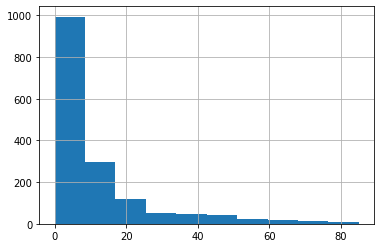

In [31]:
hist = employee_fired['Experience'].hist()

## Work experience for still working employees (on 01.12.2017)

In [24]:
experience_in_months = []
for employee_id in list(employee_stayed.index.values):
    employee_df = df[df['Emp_ID'] == employee_id]
    date_of_joining = employee_df['Dateofjoining'].unique()[0]
    last_working_day = pd.Timestamp(2017, 12, 1)
    experience_in_months.append(math.ceil((last_working_day - date_of_joining)/np.timedelta64(1, 'M')))
    
employee_stayed['Experience'] = experience_in_months

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
employee_stayed.describe()

,Experience
count,765.000000
mean,19.401307
std,23.753914
min,0.000000
25%,3.000000
50%,7.000000
75%,29.000000
max,93.000000


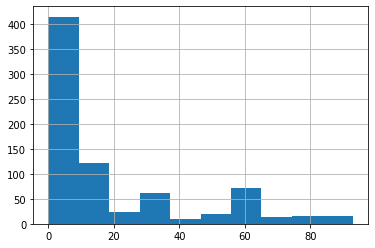

In [34]:
hist = employee_stayed['Experience'].hist()

## Fired employees who worked only one day

In [18]:
ids = employee_fired[employee_fired['Experience'] == 0]
print(ids.index.values)

[ 264 1207 1581 2397]


In [19]:
df[df['Emp_ID'] == 2397]

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
16137,2017-05-01,2397,38,Female,C8,College,47818,2017-05-15,2017-05-15,2,2,0,1


## Find people who are supposed to still work but there are no records in the last month(s)

In [20]:
last_known_date = np.datetime64('2017-12-01T00:00:00.000000000')

missing_ids = []
for employee in list(employee_stayed.index.values):
    employee_df = df[df['Emp_ID'] == employee]
    records_dates = employee_df['MMM-YY'].unique()
    if last_known_date in records_dates:
        continue
    else:
        #print(False)
        missing_ids.append(employee)
        
print(missing_ids)

[66, 383, 612, 743, 755, 770, 920, 1173, 1224, 1339, 1437, 1449, 1454, 1561, 1629, 1663, 1706, 1758, 1893, 1894, 2132, 2268, 2547, 2685]


In [79]:
x = df[df['Emp_ID'] == 25]['LastWorkingDate']

In [80]:
d = x.iloc[-1]

In [85]:
pd.isnull(d)

True

In [88]:
d.empty()

AttributeError: 'NaTType' object has no attribute 'empty'